In [39]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.manifold import TSNE
from collections import defaultdict

In [42]:
data_by_day = defaultdict(list)

In [45]:
filenames = ['data/Banana3_Day1_2018071600000.asd.txt', 'data/Banana3_Day3_2018071800000.asd.txt', 'data/Banana3_Day4_2018071800000.asd.txt',
             'data/Banana3_Day5_2018072000000.asd.txt']

cur_index = 0

for file in filenames:
    with open(file, 'r') as f:
        content = f.readlines()
        atData = False
        amplitude = []
        wavelength = []
        
        for line in content:
            line = line.strip().split("\t")
            
            if atData:
                wavelength.append(int(line[0]))
                amplitude.append(float(line[1]))

            if line[0] == "Wavelength":
                atData = True
                
        data_by_day[cur_index].append(amplitude)
        cur_index += 1

<IPython.core.display.Javascript object>


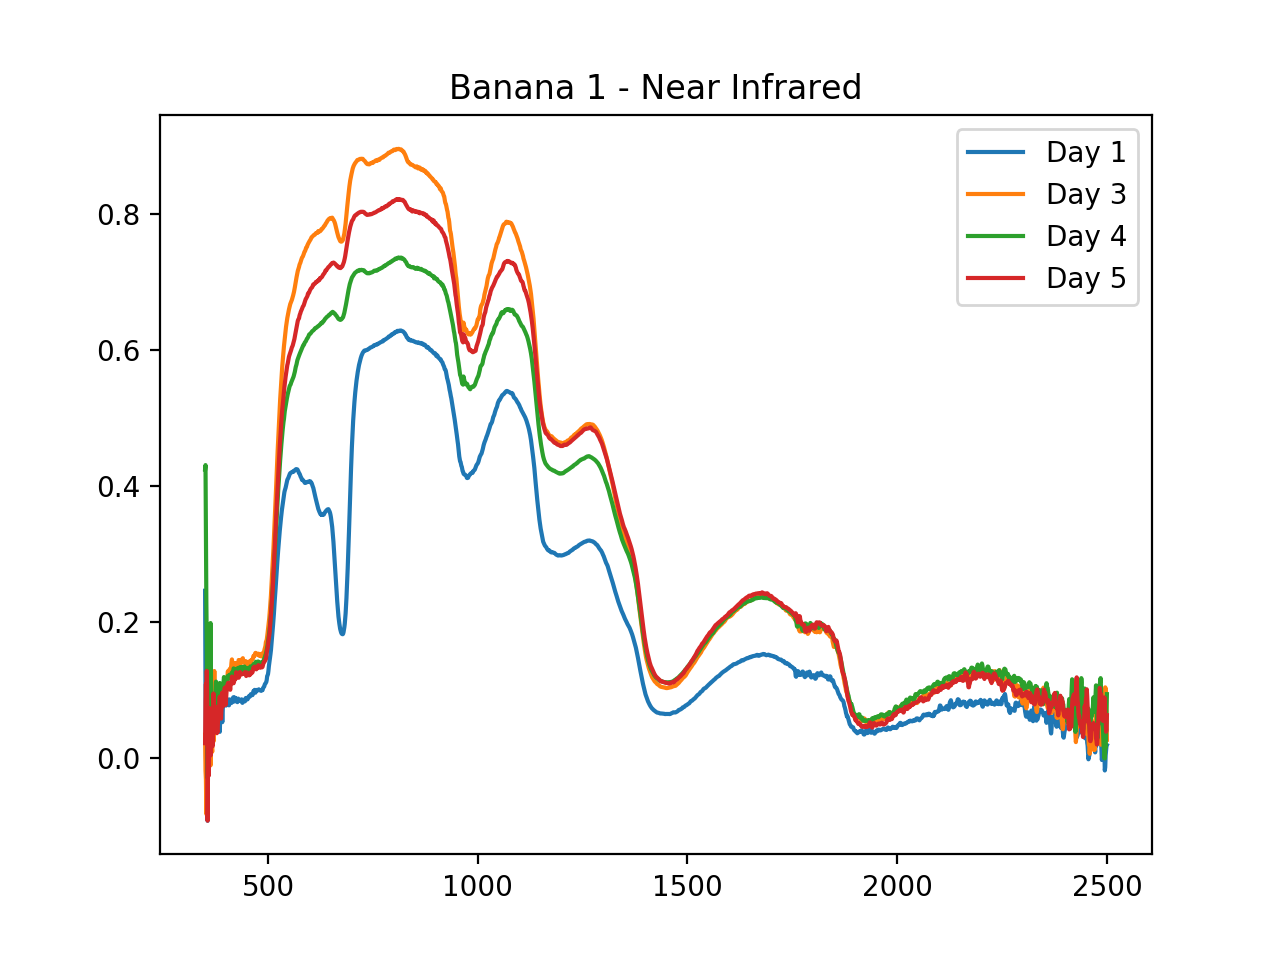

In [32]:
plt.plot(wavelength, data_by_day[0], label="Day 1")
plt.plot(wavelength, data_by_day[1], label="Day 3")
plt.plot(wavelength, data_by_day[2], label="Day 4")
plt.plot(wavelength, data_by_day[3], label="Day 5")

plt.title("Banana 1 - Near Infrared")
plt.legend()

In [55]:
reflectances = []
labels = []
for k, v in data_by_day.items():
    reflectances.append(v)
    labels.append(k)
    
reflectances = np.vstack(reflectances)
X_embedded = TSNE(n_components=2, n_iter=5000, perplexity=2, learning_rate=100.0).fit_transform(reflectances)

In [57]:
colors = {0: "red", 1: "blue", 2:"green", 3:"black"}
cmap = []
for l in labels:
    cmap.append(colors[l])
    
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=cmap)

<IPython.core.display.Javascript object>